# 로지스틱 회귀

### 데이터 준비하기

In [1]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [2]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


* 타깃 데이터에는 7개의 생선의 종류가 들어 있습니다. 타깃이 2개 이상의 클래스가 포함된 문제를 다중 분류(multi class claasification)이라고 부릅니다. 

In [3]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()

In [4]:
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [5]:
fish_target = fish['Species'].to_numpy()

In [6]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

## 로지스틱 회귀
* 로지스틱 회귀(logistic regression)는 이름은 회귀지만 분류 모델입니다. 
* 이 알고리즘은 선형 회귀와 동일하게 선형 방정식을 학습합니다. 
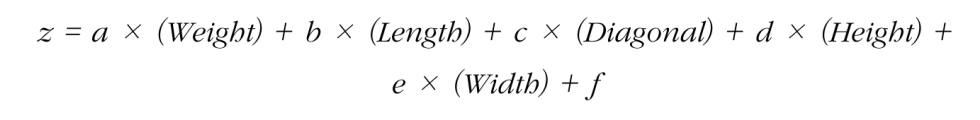

* 여기에서 a, b, c, d, e는 가중치 혹은 계수입니다. 
* 특성은 늘어났지만 다중 회귀를 위한 선형 방정식으로 볼수 있습니다. 
* z는 어떤 값도 가능합니다. 하지만 확률이 되려면 0 ~ 1 사이 값이 되어야 합니다. 
* z가 아주 큰 음수일 때 0이 되고, z가 아주 큰 양수일 때 1이 되도록 시그모이드 함수(sigmoid function) 또는 로지스틱 함수(logstic function)을 사용하면 가능합니다

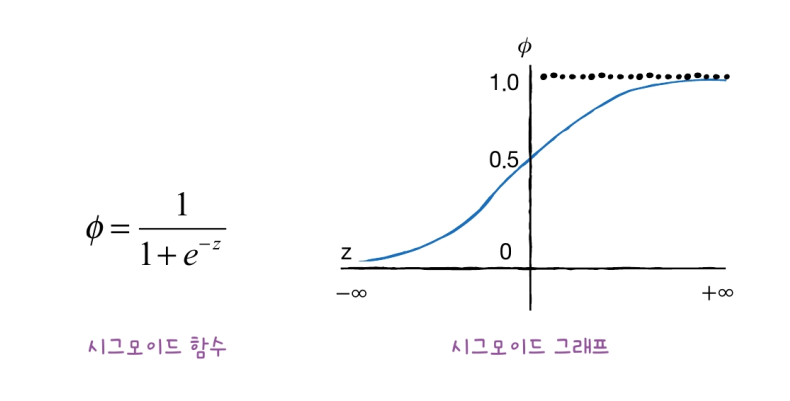

* 왼쪽의 식이 시그모이드 함수입니다. 
* 선형 방정식의 출력 z의 음수를 사용해 자연 상수 e를 거듭제곱하고 1을 더한 값의 역수를 취합니다. 
* z가 무한하게 큰 음수일 경우 이 함수는 0에 가까워지고, z가 무한하게 큰 양수가 될 때는 1에 가까워집니다. 
* z가 0일 될 때는 0.5가 됩니다. z가 어떤 값이 되더라도 절대로 0 ~ 1 사이의 범위를 벗어날 수 없습니다. 

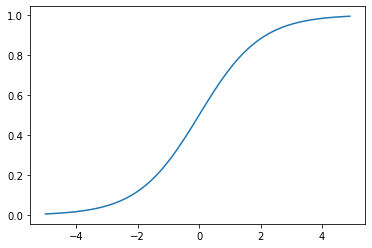

In [13]:
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))

plt.plot(z, phi)
plt.show()

### 로지스틱 회귀로 이진 분류 수행하기

* 넘파이 배열은 True, False 값을 전달하여 행을 선택할 수 있습니다. 
* 이를 불리언 인덱싱(boolean indexing)이라고 합니다. 

In [14]:
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


* 불리언 인덱싱을 사용하여 도미(Bream)와 빙어(Smelt)

In [15]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

### LogisticRegression 클래스

In [16]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

* 훈련한 모델을 사용해 train_bream_smelt에 있는 처음 5개 샘플을 추출

In [17]:
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


* predict_proba() 메서드를 사용하여 5개의 확률을 출력해 보겠습니다. 

In [18]:
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


* 어떤 클래스 값이 양성인지 확인하겠습니다. 
* Bream -> 0
* Smelt -> 1

In [19]:
print(lr.classes_)

['Bream' 'Smelt']


* 로지스틱 회귀 모델이 학습한 방정식은 아래와 같습니다. 
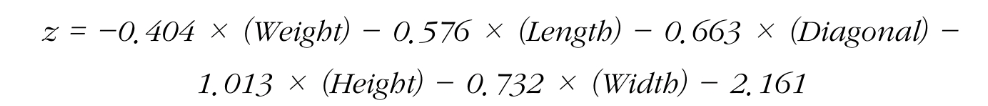

In [20]:
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


* decision_function() 메서드로 z 값을 출력해 보겠습니다. 

In [21]:
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


* scipy 안에 expit() 함수는 시그모이드 함수입니다. 

In [22]:
from scipy.special import expit

print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


### 로지스틱 회귀로 다중 분류 수행하기
* 다중 분류도 LogisticRegression 클래스를 기본적으로 반복적인 알고리즘을 사용합니다. 
* max_iter 매개변수에서 반복 횟수를 지정하며 기본값은 100입니다. 
* 반복 횟수가 부족하면 경고가 발생합니다. 

* LogisticRegression은 기본적으로 릿지 회귀와 같이 계수의 제곱을 규제합니다. 
* 이런 규제를 L2 규제라고 합니다. 
* 릿지 회귀에서는 alpha 매개변수로 규제의 양을 조절했습니다. alpha가 커지면 규제도 커집니다. 
* LogisticRegression에서 규제를 제어하는 매개변수는 C입니다. 하지만 C는 alpha와 반대로 작을수록 규제가 커집니다. 
* C의 기본값은 1입니다. 여기서는 규제를 조금 완화하기 위해 20으로 늘리겠습니다.

In [23]:
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [24]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [25]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [26]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


* 다중 분류일 경우 선형 방정식은 어떤 모습일지 coef_와 intercept_의 크기를 출력하겠습니다. 

In [27]:
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


In [30]:
lr.coef_

array([[-1.49003182, -1.02923796,  2.59355283,  7.70351706, -1.20066546],
       [ 0.19620224, -2.01054626, -3.77986602,  6.50489407, -1.99488806],
       [ 3.56277282,  6.34364362, -8.48974894, -5.75755569,  3.79310186],
       [-0.10459432,  3.60314558,  3.9306706 , -3.61727856, -1.7507156 ],
       [-1.40057199, -6.07506549,  5.25966332, -0.8722463 ,  1.8604401 ],
       [-1.3853048 ,  1.49219123,  1.39229689, -5.67731841, -4.40095122],
       [ 0.62152787, -2.32413073, -0.90656867,  1.71598783,  3.69367837]])

In [31]:
lr.intercept_

array([-0.09204745, -0.2629067 ,  3.25100608, -0.14740786,  2.65494171,
       -6.78779861,  1.38421283])

* 다중 분류 클래스마다 z 값을 하나씩 계산합니다. 당연히 가장 높은 z 값을 출력하는 클래스가 예측 클래스가 됩니다. 
* 다중 분류는 소프트맥스(softmax) 함수를 사용하여 7개의 z값을 확률로 변환합니다. 
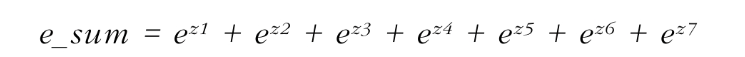

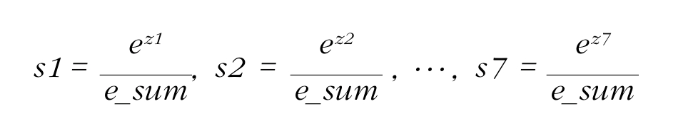

* decision_function() 메서드로 z1 ~ z7까지의 값을 구한 다음 소프트맥스 함수를 사용하여 확률로 변환하겠습니다. 

In [28]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


* scipy는 소프트맥스 함수도 제공합니다. 
* axis=1로 지정하여 각 행, 즉 각 샘플에 대해 소프트맥스를 계산합니다. 
* 만약 axis 매개변수를 지정하지 않으면 배열 전체에 대해 소프트맥스를 계산합니다. 

In [29]:
from scipy.special import softmax

proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
